In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from IPython.display import Image
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
rcParams['legend.title_fontsize']= 'xx-large'
%matplotlib inline
#rcParams.keys()

# Motivación

Las ecuaciones diferenciales son relaciones entre una función y sus derivadas, y se utilizan para modelar sistemas en todos los campos de la ingeniería y la ciencia. Por ejemplo, una simple ecuación diferencial relaciona la aceleración de un coche con su posición. A diferencia de la diferenciación, donde las soluciones analíticas suelen poder calcularse, en general es muy difícil encontrar soluciones exactas a las ecuaciones diferenciales. Por ello, las soluciones numéricas son fundamentales para que estas ecuaciones sean útiles para el diseño y la comprensión de los sistemas de la ingeniería y la ciencia.

Debido a que las ecuaciones diferenciales son tan comunes en la ingeniería, la física y las matemáticas, su estudio es un campo vasto y rico que no puede ser cubierto en este texto introductorio. Este capítulo cubre las ecuaciones diferenciales ordinarias con valores iniciales especificados, una subclase de problemas de ecuaciones diferenciales llamada problemas de valor inicial. Para reflejar la importancia de esta clase de problemas, Python tiene todo un conjunto de funciones para resolver este tipo de problemas. Al final de este capítulo, deberías entender qué son los problemas de valor inicial de ecuaciones diferenciales ordinarias, cómo plantear estos problemas a Python y cómo funcionan estos solucionadores de Python.

# Ejemplo: 

Un objeto de masa $m=5$ kg está cayendo hacia la tierra, con un arrastre proporcional a su velocidad con un coeficiente de arrastre de 2 kg/seg. Formule una ecuación diferencial para la velocidad $v$.

**Solución:** Aquí necesitamos un poco de conocimientos de mecánica, para saber que podemos escribir una ecuación diferencial para $v$ utilizando $F=ma=m(dv/dt)$. Entonces, todo lo que tenemos que hacer es darnos cuenta de que la fuerza que tira del objeto hacia la tierra va a ser $mg$, y el arrastre que lo frena será $2v$ usando la información de la pregunta. Uniendo todo esto tenemos nuestra ecuación diferencial:
\begin{equation}
m\frac{dv}{dt}=mg−2v \rightarrow m\frac{dv}{dt}=mg−2\frac{dx}{dt} \rightarrow m\frac{d^2x}{dt^2}=mg−2\frac{dx}{dt} \rightarrow m\frac{d^2x}{dt^2}+2\frac{dx}{dt}-mg=0
\end{equation}

o en otra notación 
\begin{equation}
m\ddot x+2\dot x-mg=0, \ \ \ \ \ \ x=x(t), \ \ \ \ \ \ \ \dot x=\dot x(t)=\frac{dx}{dt}
\end{equation}

La solución analítica es
\begin{equation}
x(t)=-c_1\frac{m}{k}e^{-\frac{2t}{m}}+\frac{mg}{k}t+c_2
\end{equation}

suponiendo que en $t=0$ el objeto empieza en el punto de referencia del eje de coordenadas, entonces $c_1=-mg/2$ y $c_2=-m^2g/(2k)$.

In [4]:
t=np.linspace(0,1,20)
def func1(t,m,k):
    g=9.8
    c1=-m*g/2
    c2=-m**2*g/(2*k)
    return -m/k*np.exp(-2*t/m)*c1+m*g*t/k+c2

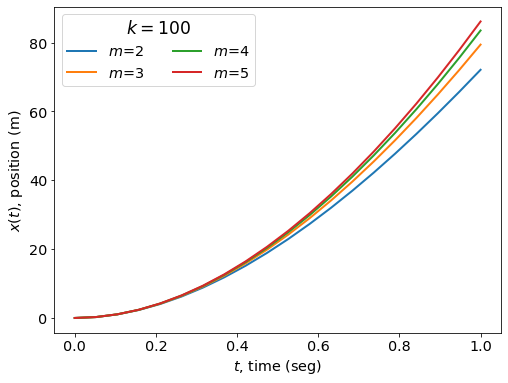

In [5]:
plt.figure(figsize=(8,6))
for m in np.arange(2,6,1):
    plt.plot(t,func1(t,m,0.1),label="$m$={}".format(m))
    #plt.yscale('log')
    plt.legend(title="$k=100$",ncol=2)
plt.xlabel("$t$, time (seg)")
plt.ylabel("$x(t)$, position (m)")
plt.show()

# Otro ejemplo: 

En un péndulo simple un objeto de masa $m$ está unido a una cuerda de longitud $L$ y describe oscilaciones cuando este se deja soltar desde una posición distinta al equilibrio. La ecuación diferencial que describe el desplazamiento del ánguo $\theta$ como una función del tiempo es:
\begin{equation}
L\frac{d^2\theta(t)}{dt^2}=-g\theta(t), \ \ \ \ \ \sin(\theta(t))\approx\theta(t)
\end{equation}

La solución analítica es
\begin{equation}
\theta(t)=\cos\left(\sqrt{\frac{g}{L}}t\right)
\end{equation}

# Enunciado del problema del valor inicial de la EDO

Una ecuación diferencial es una relación entre una función, $f(x)$, su variable independiente, $x$ y cualquier número de sus derivadas. Una ecuación diferencial ordinaria o EDO es una ecuación diferencial donde la variable independiente, y por lo tanto también las derivadas, están en una dimensión. Para el propósito de lo siguiente, asumimos que una EDO se puede escribir
\begin{equation}
F\left(x,f(x),\frac{df(x)}{dx},\frac{d^2f(x)}{dx^2},\frac{d^3f(x)}{dx^3},...,\frac{d^{n-1}f(x)}{dx^{n-1}}\right)=\frac{d^nf(x)}{dx^n},
\end{equation}

donde $F$ es una función arbitraria que incorpora uno o todos los argumentos de entrada, y $n$ es el orden de la ecuación diferencial. Esta ecuación se denomina EDO de orden $n$.

Un conjunto común de valores conocidos para la solución de una EDO es el valor inicial. Para una EDO de orden $n$, el valor inicial es un valor conocido para las derivadas 0 a $(n-1)$ en $x=0,f(0),f^{(1)}(0),f^{(2)}(0),...,f^{(n-1)}(0)$. Para una cierta clase de ecuaciones diferenciales ordinarias, el valor inicial es suficiente para encontrar una solución particular única. Encontrar la solución de una EDO dado un valor inicial se denomina problema de valor inicial. Aunque el nombre sugiere que sólo cubriremos las EDO que evolucionan en el tiempo, los problemas de valor inicial también pueden incluir sistemas que evolucionan en otras dimensiones, como el espacio. Intuitivamente, la ecuación del péndulo puede resolverse como un problema de valor inicial porque bajo sólo la fuerza de la gravedad, una posición y velocidad iniciales deberían ser suficientes para describir el movimiento del péndulo para todo el tiempo posterior.

Cubriremos varios métodos de aproximación numérica de la solución de los problemas de valor inicial en una malla numérica. Aunque los problemas de valor inicial abarcan más que las ecuaciones diferenciales en el tiempo, utilizamos el tiempo como variable independiente. También utilizamos varias notaciones para la derivada de $f(t)$: $f'(t)$, $f^{(1)}(t)$, $df(t)/dt$ y $f'$, la que sea más conveniente para el contexto.

# Reducción de orden

Muchos métodos numéricos para resolver problemas de valor inicial están diseñados específicamente para resolver ecuaciones diferenciales de primer orden. Para que estos solucionadores sean útiles para resolver ecuaciones diferenciales de orden superior, a menudo debemos reducir el orden de la ecuación diferencial a primer orden. Para reducir el orden de una ecuación diferencial, consideremos un vector, $S(t)$ que es el estado del sistema en función del tiempo. En general, el estado de un sistema es una colección de todas las variables dependientes que son relevantes para el comportamiento del sistema. Recordando que las EDOs de interés en este libro se pueden expresar como
\begin{equation}
f^{(n)}(t)=F\left(t,f(t),f^{(1)}(t),f^{(2)}(t),f^{(3)}(t),...,f^{(n-1)}(t)\right),
\end{equation}

para los problemas de valor inicial, es útil tomar el estado como
\begin{equation}
S(t)=\begin{bmatrix}
f(t)\\ 
f^{(1)}(t)\\ 
f^{(2)}(t)\\ 
f^{(3)}(t)\\ 
\cdot\cdot\cdot\\ 
f^{(n-1)}(t)
\end{bmatrix}
\end{equation}
Entonces la derivada de este estado es
\begin{equation}
\frac{dS(t)}{dt}=
\begin{bmatrix} 
f^{(1)}(t)\\ 
f^{(2)}(t)\\ 
f^{(3)}(t)\\ 
f^{(4)}(t)\\ 
\cdot\cdot\cdot\\ 
f^{(n)}(t)
\end{bmatrix}=
\begin{bmatrix} 
f^{(1)}(t)\\ 
f^{(2)}(t)\\ 
f^{(3)}(t)\\ 
f^{(4)}(t)\\ 
\cdot\cdot\cdot\\ 
F\left(t,f(t),f^{(1)}(t),f^{(2)}(t),f^{(3)}(t),...,f^{(n-1)}(t)\right)
\end{bmatrix}=
\begin{bmatrix} 
S_2(t)\\ 
S_3(t)\\ 
S_4(t)\\ 
S_5(t)\\ 
\cdot\cdot\cdot\\ 
F\left(t,S_1(t),S_2(t),...,S_{n-1}(t)\right)
\end{bmatrix}
\end{equation}
donde $S_i(t)$ es el $i$-ésimo elemento de $S(t)$. Con el estado escrito de esta manera, $dS(t)/dt$ puede escribirse utilizando sólo $S(t)$ (es decir, sin $f(t)$) o sus derivadas. En particular, $dS(t)/dt=F(t,S(t))$, donde $F$ es una función que ensambla adecuadamente el vector que describe la derivada del estado. Esta ecuación tiene la forma de una ecuación diferencial de primer orden en $S$. Esencialmente, lo que hemos hecho es convertir una EDO de $n$-ésimo orden en $n$ EDO de primer orden que están acopladas, lo que significa que comparten los mismos términos.

**¡PRUEBA!** 

Reducir la ecuación del péndulo de segundo orden a primer orden, donde 
\begin{equation}
\frac{d^2\theta(t)}{dt^2}=-\frac{g}{L}\theta(t) \ \ \ \ \ \rightarrow\ \ \ \ \ \ \theta''(t)=-\frac{g}{L}\theta(t) \ \ \ \ \ \rightarrow\ \ \ \ \ \ S(t)=\begin{bmatrix} 
\theta(t)\\ 
\theta'(t)
\end{bmatrix}
\end{equation}

Tomando la derivada de $S(t)$ y sustituyendo da la expresión correcta.
\begin{equation}
\frac{dS(t)}{dt}=\begin{bmatrix} 
\theta'(t)\\ 
\theta''(t)
\end{bmatrix}=\begin{bmatrix} 
S_2(t)\\ 
-\frac{g}{L}S_1(t)
\end{bmatrix}
\end{equation}


Resulta que esta EDO se puede escribir en forma matricial
\begin{equation}
\frac{dS(t)}{dt}=\begin{bmatrix} 
0 & 1\\ 
-\frac{g}{L} & 0
\end{bmatrix} S(t)
\end{equation}

Las EDOs que pueden escribirse de esta manera se dice que son EDOs lineales. Aunque al reducir el orden de una EDO a primer orden se obtiene una EDO con múltiples variables, todas las derivadas se siguen tomando con respecto a la misma variable independiente, $t$. Por lo tanto, se mantiene la ordinalidad de la ecuación diferencial. Cabe destacar que el estado puede contener múltiples variables dependientes y sus derivadas siempre que las derivadas sean con respecto a la misma variable independiente.

# El método de Euler

Sea $\frac{dS(t)}{dt}=F[t,S(t)]$ una EDO de primer orden definida explícitamente. Es decir, $F$ es una función que devuelve la derivada, o cambio, de un estado dado un tiempo y un valor de estado. Además, dejemos que $t$ sea una cuadrícula numérica del intervalo $[t_0,t_f]$ con un espaciado $h$. Sin pérdida de generalidad, suponemos que $t_0=0$, y que $t_f=Nh$ para algún entero positivo, $N$.

La aproximación lineal de $S(t)$ alrededor de $t_j$ en $t_{j+1}$ es
\begin{equation}
S(t_{j+1})=S(t_j)+(t_{j+1}-t_j)\frac{dS(t_j)}{dt},
\end{equation}
que también puede escribirse
\begin{equation}
S(t_{j+1})=S(t_j)+hF(t_j,S(t_j)).
\end{equation}

Esta fórmula se denomina **Fórmula Explícita de Euler**, y nos permite calcular una aproximación para el estado en $S(t_{j+1})$ dado el estado en $S(t_j)$. Partiendo de un valor inicial dado de $S_0=S(t_0)$, podemos utilizar esta fórmula para integrar los estados hasta $S(t_f)$; estos valores de $S(t)$ son entonces una aproximación para la solución de la ecuación diferencial. La fórmula explícita de Euler es el método más sencillo e intuitivo para resolver los problemas de valor inicial. En cualquier estado $(t_j,S(t_j))$ utiliza $F$ en ese estado para "apuntar" hacia el siguiente estado y luego se mueve en esa dirección una distancia de $h$. Aunque hay métodos más sofisticados y precisos para resolver estos problemas, todos tienen la misma estructura fundamental. Por ello, enumeramos explícitamente los pasos para resolver un problema de valor inicial utilizando la fórmula de Euler explícita.

<img width="40%" src="../figures/Euler-method-illustration.png"/> 

**¿Cómo lo hacemos?** Supongamos que se nos da una función $F(t,S(t))$ que calcula $dS(t)/dt$, una cuadrícula numérica, $t$, del intervalo, $[t_0,t_f]$, y un valor de estado inicial $S_0=S(t_0)$. Podemos calcular $S(t_j)$ para cada $t_j$ en $t$ mediante los siguientes pasos.

- Almacenar $S_0=S(t_0)$ en una matriz, $S$.
- Calcular $S(t_1)=S_0+hF(t_0,S_0)$.
- Almacenar $S_1=S(t_1)$ en $S$.
- Calcular $S(t_2)=S_1+hF(t_1,S_1)$.
- Almacenar $S_2=S(t_1)$ en $S$.
- ....
- ....
- ....
- Calcular $S(t_f)=S_{f-1}+hF(t_{f-1},S_{f-1})$.
- Guardar $S_f=S(t_f)$ en $S$.
- $S$ es una aproximación a la solución del problema de valor inicial.

Cuando se utiliza un método con esta estructura, decimos que el método integra la solución de la EDO.

**PRUEBA** La ecuación diferencial 
\begin{equation}
\frac{df(t)}{dt}=e^{-t}
\end{equation}
con condición inicial $f_0=-1$ tiene la solución exacta $f(t)=-e^{-t}$. Aproxima la solución de este problema de valor inicial entre 0 y 1 en incrementos de 0.1 utilizando la Fórmula de Euler Explícita. Grafique la diferencia entre la solución aproximada y la solución exacta.

In [7]:
def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

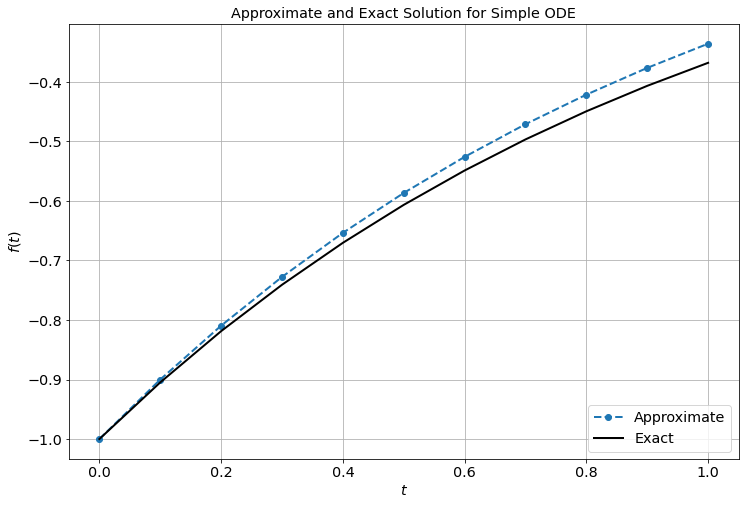

In [9]:
# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'o--', label='Approximate')
plt.plot(t, -np.exp(-t), 'k', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.grid()
plt.legend(loc='lower right')
plt.show()

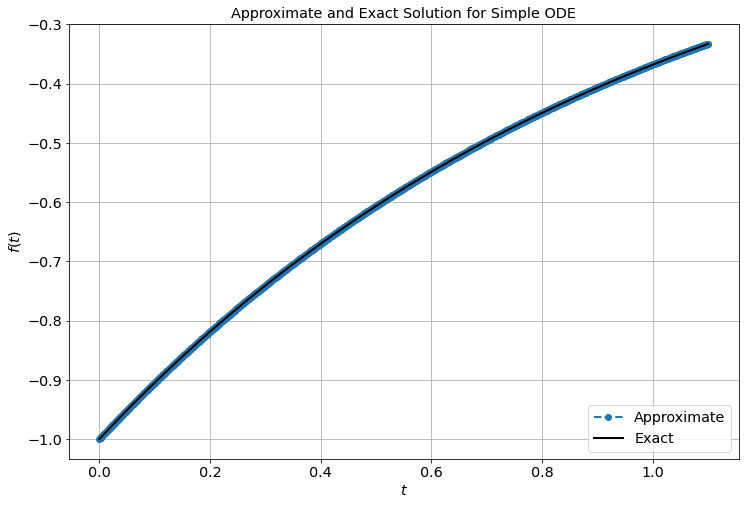

In [10]:
# Define parameters
f = lambda y,t: np.exp(-t)
y0=-1
y = odeEuler(f,y0,t)
t = np.linspace(0,1.1,1000)
plt.figure(figsize = (12, 8))
plt.plot(t, odeEuler(f,y0,t), 'o--', label='Approximate')
plt.plot(t, -np.exp(-t), 'k', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.grid()
plt.legend(loc='lower right')
plt.show()

En la figura anterior, podemos ver que cada punto es una aproximación basada en el punto anterior de forma lineal. A partir del valor inicial, podemos obtener finalmente una aproximación de la solución en la malla numérica. Si repetimos el proceso para h=0.01, obtenemos una mejor aproximación de la solución:

In [12]:
def solveEDO(f,h=0.1):
    #h = 0.01 # Step size
    t = np.arange(0, 1 + h, h) # Numerical grid
    s0 = -1 # Initial Condition

    # Explicit Euler Method
    s = np.zeros(len(t))
    s[0] = s0

    for i in range(0, len(t) - 1):
        s[i + 1] = s[i] + h*f(t[i], s[i])
    return t, s

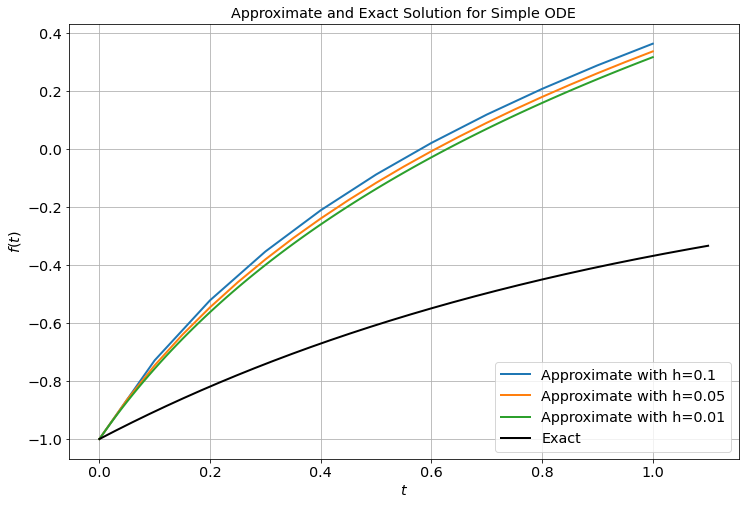

In [13]:
plt.figure(figsize = (12, 8))
f = lambda s,t: np.exp(-t)

for i in [0.1,0.05,0.01]:
    plt.plot(solveEDO(f,i)[0],solveEDO(f,i)[1], label='Approximate with h={}'.format(i))
plt.plot(t, -np.exp(-t), 'k', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.grid()
plt.legend(loc='lower right')
plt.show()

La fórmula de Euler explícita se llama "explícita" porque sólo requiere información en $t_j$ para calcular el estado en $t_{j+1}$. Es decir, $S(t_{j+1})$ puede escribirse explícitamente en términos de los valores que tenemos (es decir, $t_j$ y $S(t_j)$). La fórmula de Euler implícita puede derivarse tomando la aproximación lineal de $S(t)$ en torno a $t_{j+1}$ y calculándola en $t_j$:
\begin{equation}
S(t_{j+1})=S(t_j)+hF(t_{j+1},S(t_{j+1})).
\end{equation}

Esta fórmula es peculiar porque requiere que conozcamos $S(t_{j+1})$ para calcular $S(t_{j+1})$.

Sin embargo, ocurre que a veces podemos utilizar esta fórmula para aproximar la solución de los problemas de valor inicial. Antes de dar detalles sobre cómo resolver estos problemas utilizando la Fórmula de Euler Implícita, damos otra fórmula implícita llamada Fórmula Trapezoidal, que es el promedio de las Fórmulas de Euler Explícita e Implícita:
\begin{equation}
S(t_{j+1})=S(t_j)+\frac{h}{2}(F(t_j,S(t_j))+F(t_{j+1},S(t_{j+1})).
\end{equation}

# Error numérico e inestabilidad

Hay dos cuestiones principales que hay que tener en cuenta con respecto a los esquemas de integración para las EDO: **la precisión** y **la estabilidad**. 

- **La precisión** se refiere a la capacidad de un esquema para acercarse a la solución exacta, que suele ser desconocida, en función del tamaño del paso $h$. Anteriormente se ha hecho referencia a la precisión utilizando la notación $\mathcal{O}(h^p)$. La misma notación se traduce en la resolución de las EDO. 
- **La estabilidad** de un esquema de integración es su capacidad para evitar que el error crezca a medida que se integra en el tiempo. Si el error no crece, el esquema es estable; en caso contrario, es inestable. Algunos esquemas de integración son estables para ciertas elecciones de $h$ e inestables para otras; estos esquemas de integración también se denominan inestables.

Para ilustrar los problemas de estabilidad, resolvemos numéricamente la ecuación del péndulo utilizando las fórmulas de Euler explícita, Euler implícita y trapezoidal.

**¡PRUEBA!** Utilice las fórmulas de Euler explícita, implícita y trapezoidal para resolver la ecuación del péndulo en el intervalo de tiempo $[0,5]$ en incrementos de 0.1 y para una solución inicial de $S_0=[1, 0]$. Para los parámetros del modelo utilizando $\sqrt{g/L}=4$. Trazar la solución aproximada en un solo gráfico.

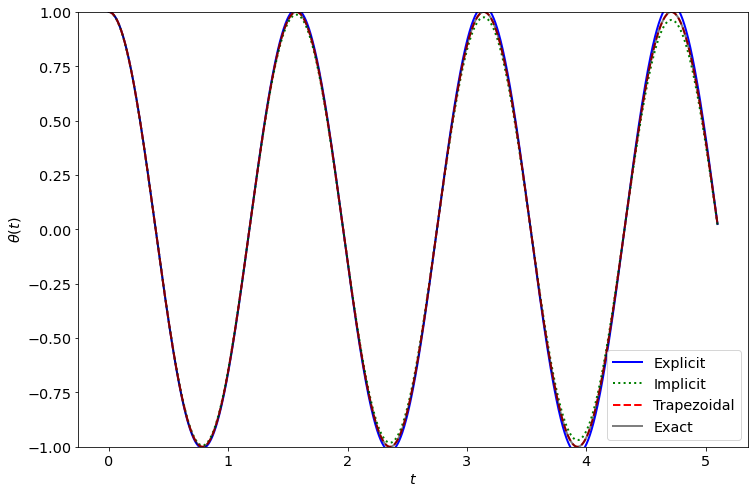

In [30]:
from numpy.linalg import inv
# define step size
h = 0.001
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1, h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k', alpha=0.5)
plt.ylim([-1, 1])
plt.xlabel('$t$')
plt.ylabel(r'$\theta (t)$')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.show()

**Para RECORDAR y evaluar, ¿Cómo lo resolvimos?**

Recoerdemos que: Primero podemos reducir la ecuación del péndulo de segundo orden a primer orden, donde 
\begin{equation}
\frac{d^2\theta(t)}{dt^2}=-\frac{g}{L}\theta(t) \ \ \ \ \ \rightarrow\ \ \ \ \ \ \theta''(t)=-\frac{g}{L}\theta(t) \ \ \ \ \ \rightarrow\ \ \ \ \ \ S(t)=\begin{bmatrix} 
\theta(t)\\ 
\theta'(t)
\end{bmatrix}=\begin{bmatrix} 
S_1\\ 
S_2
\end{bmatrix}
\end{equation}

Tomando la derivada de $S(t)$ y sustituyendo da la expresión correcta.
\begin{equation}
\frac{dS(t)}{dt}=\begin{bmatrix} 
\theta'(t)\\ 
\theta''(t)
\end{bmatrix}=\begin{bmatrix} 
S_2(t)\\ 
-\frac{g}{L}S_1(t)
\end{bmatrix} \ \ \ \ \rightarrow \ \ \ \ \frac{dS(t)}{dt}=\begin{bmatrix} 
0 & 1\\ 
-\frac{g}{L} & 0
\end{bmatrix} S(t)
\end{equation}

- **Fórmula Explícita de Euler:** 
\begin{equation}
S(t_{j+1})=S(t_j)+hF(t_j,S(t_j)).
\end{equation}
- **Fórmula Implícita de Euler:**
\begin{equation}
S(t_{j+1})=S(t_j)+hF(t_{j+1},S(t_{j+1})).
\end{equation}
- **Fórmula Trapezoidal:** 
\begin{equation}
S(t_{j+1})=S(t_j)+\frac{h}{2}(F(t_j,S(t_j))+F(t_{j+1},S(t_{j+1})).
\end{equation}



- **Fórmula Explícita de Euler:** 
\begin{eqnarray}
S(t_{j+1})=S(t_j)+hF(t_j,S(t_j)) \ \ \ \rightarrow \ \ \ \frac{S(t_{j+1})-S(t_j)}{h}=F(t_j,S(t_j))=\frac{dS(t)}{dt} \\
F(t_j,S(t_j))=\begin{bmatrix} 
0 & 1\\ 
-\frac{g}{L} & 0
\end{bmatrix} S(t_j)
\end{eqnarray}

Entonces
\begin{equation}
S(t_{j+1})=S(t_j)+h\begin{bmatrix} 
0 & 1\\ 
-\frac{g}{L} & 0
\end{bmatrix} S(t_j)=\begin{bmatrix} 
1 & 0\\ 
0 & 1
\end{bmatrix} S(t_j)+h\begin{bmatrix} 
0 & 1\\ 
-\frac{g}{L} & 0
\end{bmatrix} S(t_j)=\begin{bmatrix} 
1 & h\\ 
-\frac{gh}{L} & 1
\end{bmatrix} S(t_j)
\end{equation}

- **Fórmula Implícita de Euler:** 
\begin{equation}
S(t_{j+1})=\begin{bmatrix} 
1 & -h\\ 
\frac{gh}{L} & 1
\end{bmatrix}^{-1} S(t_j)
\end{equation}

- **Fórmula Trapezoidal:** 
\begin{equation}
S(t_{j+1})=\begin{bmatrix} 
1 & -h/2\\ 
\frac{gh}{2L} & 1
\end{bmatrix}^{-1} \begin{bmatrix} 
1 & h/2\\ 
-\frac{gh}{2L} & 1
\end{bmatrix}S(t_j)
\end{equation}

# Métodos Predictor-Corrector y Runge Kutta
## Métodos del predictor-corrector

Dado cualquier tiempo y valor de estado, la función, $F(t,S(t))$ devuelve el cambio de estado $dS(t)/dt$. Los métodos **predictores-correctores** de resolución de problemas de valor inicial mejoran la precisión de la aproximación de los métodos **no predictores-correctores** consultando la función $F$ varias veces en diferentes lugares (**predicciones**), y luego utilizando una media ponderada de los resultados (**correcciones**) para actualizar el estado. Básicamente, utiliza dos fórmulas: **el predictor** y **el corrector**. 

- **El predictor** es una fórmula explícita y primero estima la solución en $t_{j+1}$, es decir, podemos utilizar el método de Euler u otros métodos para terminar este paso. 
- Después de obtener la solución $S(t_{j+1})$, podemos aplicar el corrector para mejorar la precisión. Utilizando el $S(t_{j+1})$ encontrado en el lado derecho de una fórmula que de otro modo sería implícita, el corrector puede calcular una nueva solución más precisa.

- El **método del punto medio** tiene un paso de predicción:
\begin{equation}
S(t_j+h/2)=S(t_j)+\frac{h}{2}F(t_j,S(t_j))
\end{equation}
que es la predicción del valor de la solución a medio camino entre $t_j$ y $t_{tj+1}$.

- A continuación, calcula el paso del corrector:
\begin{equation}
S(t_{j+1})=S(t_j)+hF(t_j+h/2,S(t_j+h/2))
\end{equation}
que calcula la solución en $S(t_{j+1})$ a partir de $S(t_j)$ pero utilizando la derivada de $S(t_{j+h/2})$.

## Métodos Runge Kutta

Los métodos **Runge Kutta (RK)** son uno de los métodos más utilizados para resolver las EDO. Recordemos que el método de Euler utiliza los dos primeros términos de la serie de Taylor para aproximar la integración numérica, que es lineal: $S(t_{j+1})=S(t_j+h)=S(t_j)+h⋅S'(t_j)$.

Podemos mejorar mucho la precisión de la integración numérica si mantenemos más términos de la serie en
\begin{equation}
S(t_{j+1})=S(t_j+h)=S(t_j)+S'(t_j)h+\frac{1}{2!}S''(t_j)h^2+...+\frac{1}{n!}S^{(n)}(t_j)h^n
\end{equation}

Para obtener esta solución más precisa, necesitamos derivar las expresiones de $S''(t_j)$, $S''(t_j)$, ..., $S^{(n)}(t_j)$. Este trabajo extra puede evitarse utilizando los métodos RK, que se basan en series de Taylor truncadas, pero no requieren el cálculo de estas derivadas superiores.

# Python ODE Solvers

En scipy, hay varias funciones incorporadas para resolver problemas de valor inicial. La más utilizada es la función `scipy.integrate.solve_ivp`. La construcción de la función se muestra a continuación:

**CONSTRUCCIÓN:**

Sea $F$ es una función objeto de la función que calcula $dS(t)/dt=F(t,S(t))$, con condicion inicial $S(t_0)=S_0$, y donde $t$ es una variable independiente unidimensional (tiempo), $S(t)$ es una función vectorial-valorada $n$-dimensional (estado), y la $F(t,S(t))$ define las ecuaciones diferenciales. $S_0$ es un valor inicial de $S$. La función $F$ debe tener la forma $dS=F(t,S)$, aunque el nombre no tiene que ser $F$. El objetivo es encontrar el $S(t)$ que satisface aproximadamente las ecuaciones diferenciales, dado el valor inicial $S(t_0)=S_0$.

La forma de utilizar el solucionador para resolver la ecuación diferencial es: `solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)`, donde 
- `fun` toma la función en el lado derecho del sistema. 
- `t_span` es el intervalo de integración $(t_0,t_f)$, donde $t_0$ es el inicio y $t_f$ es el final del intervalo. 
- `s0` es el estado inicial. Hay un par de métodos que podemos elegir, el predeterminado es `RK45`, que es el método Runge-Kutta explícito de orden 5(4). Hay otros métodos que se pueden usar también. 
- `t_eval` toma los tiempos en los que se almacena la solución calculada, y debe estar ordenado y estar dentro de `t_span`.

Probemos un ejemplo a continuación.

**EJEMPLO**: Consideremos la EDO 
\begin{equation}
\frac{dS(t)}{dt}=\cos(t)
\end{equation}
para un valor inicial $S_0=0$. La solución exacta de este problema es $S(t)=\sin(t)$. Utilicemos `solve_ivp` para aproximar la solución de este problema de valor inicial sobre el intervalo $[0,\pi]$. Grafiquemos la solución aproximada frente a la solución exacta y el error relativo en el tiempo.

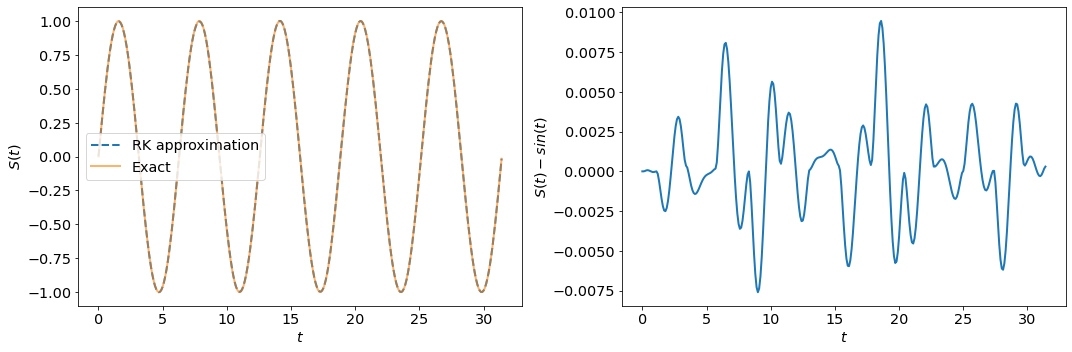

In [37]:
from scipy.integrate import solve_ivp

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, 10*np.pi, 0.1)
sol = solve_ivp(F, [0, 10*np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(sol.t, sol.y[0], '--', label="RK approximation")
plt.plot(sol.t, np.sin(sol.t), label="Exact", alpha=0.6)
plt.xlabel('$t$')
plt.ylabel('$S(t)$')
plt.legend()
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('$t$')
plt.ylabel('$S(t) - sin(t)$')
plt.tight_layout()
plt.show()

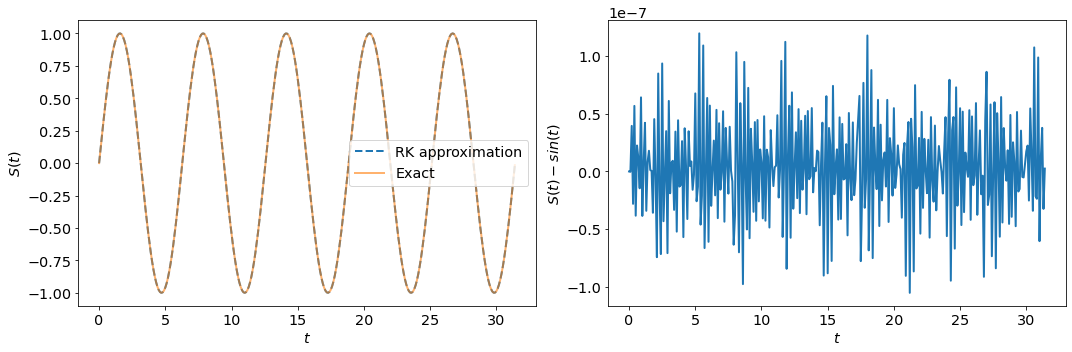

In [38]:
sol = solve_ivp(F, [0, 10*np.pi], [0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(sol.t, sol.y[0], '--', label="RK approximation")
plt.plot(sol.t, np.sin(sol.t), label="Exact", alpha=0.6)
plt.xlabel('$t$')
plt.ylabel('$S(t)$')
plt.legend()
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('$t$')
plt.ylabel('$S(t) - sin(t)$')
plt.tight_layout()
plt.show()

## ¿¿¿¿¿Sistemas de ecuaciones?????

**EJEMPLO:**

Sea el estado de un sistema definido por 
\begin{equation}
S(t)=\begin{bmatrix} 
x(t)\\ 
y(t)
\end{bmatrix}
\end{equation}
y que la evolución del sistema esté definida por la EDO 
\begin{equation}
\frac{dS(t)}{dt}=\begin{bmatrix} 
0 & t^2\\ 
-t & 0
\end{bmatrix}S(t)
\end{equation}

Utilicemos `solve_ivp` para resolver esta EDO para el intervalo de tiempo $[0,10]$ con un valor inicial de $S_0=[1.1]$. Tracemos la solución en $(x(t),y(t))$.

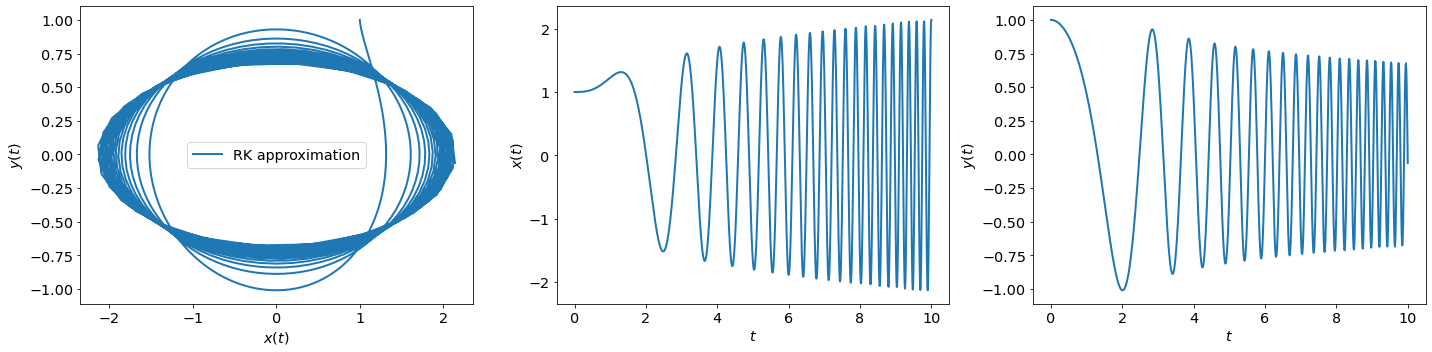

In [39]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (20, 5))
plt.subplot(131)
plt.plot(sol.y.T[:,0], sol.y.T[:,1], label="RK approximation")
plt.xlabel('$x(t)$')
plt.ylabel('$y(t)$')
plt.legend()
plt.subplot(132)
plt.plot(sol.t, sol.y.T[:,0])
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.subplot(133)
plt.plot(sol.t, sol.y.T[:,1])
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

plt.tight_layout()
plt.show()



La solución analítica de este sistema es 

<img width="70%" src="../figures/sol_system2.png"/> 

In [13]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 7256
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])
 t_events: None
        y: array([[ 1.        ,  1.00000033,  1.00000266, ...,  1.84546832,
         2.09541186,  2.13845823],
       [ 1.        ,  0.99995   ,  0.9998    , ...,  0.34782586,
         0.1494309 , -0.06393475]])
 y_events: None